<a href="https://colab.research.google.com/github/Nidhi89717/tensorflow/blob/main/04_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision and Covolutional Neural Network

## Get the data
The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-02 05:54:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   187MB/s    in 0.6s    

2023-07-02 05:54:48 (187 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# Walk through pizza_steak directory and list number of files
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [ ]:
# Another way to find out how many images are in a file

num_steak_image_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_image_train

750

In [ ]:
#Get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train/') # turn our training path into a python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #Created a list of class names from the sub directory
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image from the path
  rand_img = random.sample(os.listdir(target_folder), 1) # Returns a list
  print(rand_img)

  # Read the image and plot using matplotlib
  img = mpimg.imread(target_folder + '/' + rand_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape {img.shape}')
  return img

['3894222.jpg']
Image shape (512, 512, 3)


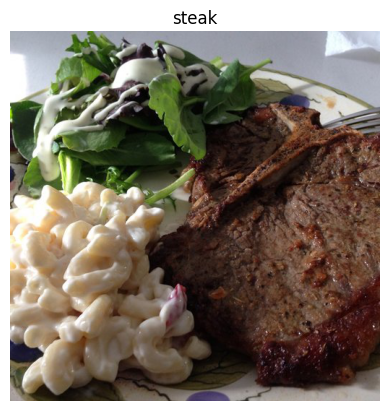

In [ ]:
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = 'steak')

['12301.jpg']
Image shape (512, 384, 3)


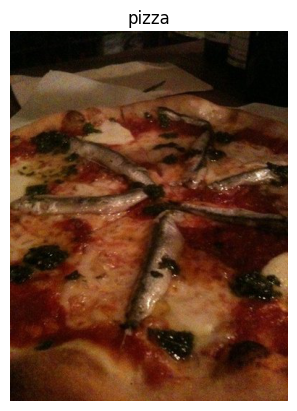

In [ ]:
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = 'pizza')

In [17]:
import tensorflow as tf

In [ ]:
# The images we have imported and plotted are giant arrays/tensors of different pixel values
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[167, 174, 182],
        [167, 174, 182],
        [167, 174, 182],
        ...,
        [208, 219, 237],
        [211, 222, 240],
        [213, 224, 244]],

       [[167, 174, 182],
        [166, 173, 181],
        [166, 173, 181],
        ...,
        [204, 215, 233],
        [207, 218, 236],
        [209, 220, 240]],

       [[168, 175, 183],
        [167, 174, 182],
        [167, 174, 182],
        ...,
        [202, 213, 231],
        [205, 216, 234],
        [207, 218, 238]],

       ...,

       [[157, 152, 146],
        [160, 155, 149],
        [162, 157, 151],
        ...,
        [180, 174, 174],
        [180, 174, 174],
        [179, 173, 173]],

       [[155, 150, 144],
        [157, 152, 146],
        [161, 156, 150],
        ...,
        [179, 173, 173],
        [180, 174, 174],
        [180, 174, 174]],

       [[154, 149, 143],
        [157, 152, 146],
        [161, 156, 150],
        ...,
        [179, 173, 17

In [ ]:
img.shape  # Returns width, height, color channels

(512, 512, 3)

> 🔑 **Note:** Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

Change the Runtime type to GPU

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess the data (get all the tensor values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up the train and test directories
train_dir = '/content/pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Import the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model(same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 253ms/step - loss: 0.6123 - accuracy: 0.6673 - val_loss: 0.4866 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4729 - accuracy: 0.7727 - val_loss: 0.3761 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 12s 248ms/step - loss: 0.4140 - accuracy: 0.8220 - val_loss: 0.3922 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3812 - accuracy: 0.8340 - val_loss: 0.3324 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.2831 - accuracy: 0.8920 - val_loss: 0.3050 - val_accuracy: 0.8720


 [CNN explainer website](https://poloclub.github.io/cnn-explainer/).

## Using the same model as before

Trying a non-CNN model on pur image data

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 198ms/step - loss: 0.8056 - accuracy: 0.5327 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 259ms/step - loss: 0.7659 - accuracy: 0.5140 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Increase the number of layers and the number of neurons

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 214ms/step - loss: 3.0564 - accuracy: 0.6133 - val_loss: 0.6464 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.7663 - accuracy: 0.6987 - val_loss: 0.5545 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 12s 258ms/step - loss: 0.7534 - accuracy: 0.7040 - val_loss: 0.4784 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.5542 - accuracy: 0.7507 - val_loss: 0.4476 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5286 - accuracy: 0.7727 - val_loss: 0.7885 - val_accuracy: 0.6260


In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 100)               15052900  
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

## 1. Become one with the data.

['2966859.jpg']
Image shape (512, 512, 3)
['3882444.jpg']
Image shape (512, 512, 3)


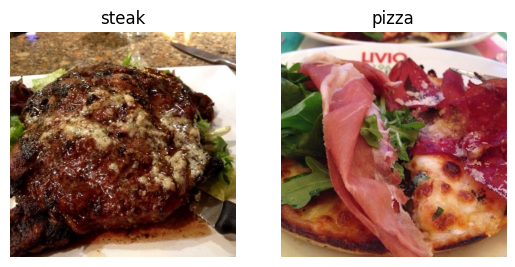

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

### Preprocess the data

In [ ]:
# Define the directory dataset path
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [ ]:
!nvidia-smi

Sun Jun 18 11:03:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20).


In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get the sample of training data batch
images,labels = train_data.next() # get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)  # 1500/32

47

In [ ]:
# Get the first two images
images[:2],images[0].shape

(array([[[[0.10588236, 0.05882353, 0.15294118],
          [0.1137255 , 0.06666667, 0.15294118],
          [0.09803922, 0.04705883, 0.11764707],
          ...,
          [0.73333335, 0.56078434, 0.44705886],
          [0.7490196 , 0.6039216 , 0.49803925],
          [0.7058824 , 0.57254905, 0.47450984]],
 
         [[0.09019608, 0.01960784, 0.12156864],
          [0.12156864, 0.0509804 , 0.13725491],
          [0.12156864, 0.04705883, 0.12156864],
          ...,
          [0.7058824 , 0.5372549 , 0.4039216 ],
          [0.70980394, 0.5686275 , 0.4431373 ],
          [0.70980394, 0.5764706 , 0.4666667 ]],
 
         [[0.15686275, 0.05490196, 0.16078432],
          [0.1764706 , 0.07843138, 0.16470589],
          [0.14117648, 0.03529412, 0.10196079],
          ...,
          [0.69803923, 0.54509807, 0.38431376],
          [0.7254902 , 0.5764706 , 0.43137258],
          [0.7176471 , 0.58431375, 0.44705886]],
 
         ...,
 
         [[0.32156864, 0.10980393, 0.16078432],
          [0.29411

In [ ]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

### Create a CNN model (start with a baseline)

In [18]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),  # input layer(specify the input shape)
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')  # output layer(here working with binary classification)
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Get the model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Fit the model


In [ ]:
# Check the length of train and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 270ms/step - loss: 0.7829 - Accuracy: 0.6233 - val_loss: 0.3854 - val_Accuracy: 0.8540
Epoch 2/5
47/47 [==============================] - 13s 280ms/step - loss: 0.4640 - Accuracy: 0.7953 - val_loss: 0.4431 - val_Accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3268 - Accuracy: 0.8793 - val_loss: 0.3638 - val_Accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 13s 279ms/step - loss: 0.1861 - Accuracy: 0.9407 - val_loss: 0.4566 - val_Accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.1011 - Accuracy: 0.9793 - val_loss: 0.4400 - val_Accuracy: 0.7920


### Evaluating our model

<Axes: >

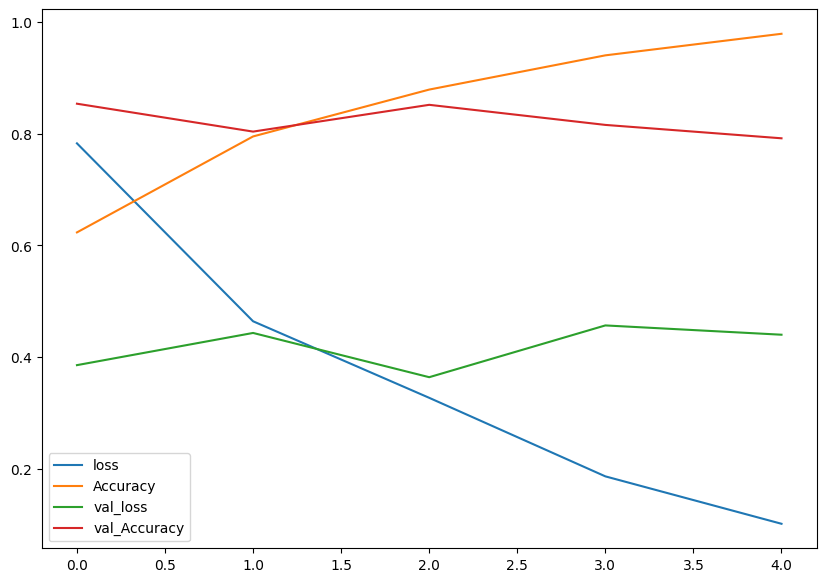

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [19]:
import matplotlib.pyplot as plt

In [20]:
# Plot the validation and training loss seperately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs,loss,label='Training loss')
  plt.plot(epochs,val_loss,label='val loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='Training accuracy')
  plt.plot(epochs,val_accuracy,label='val accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

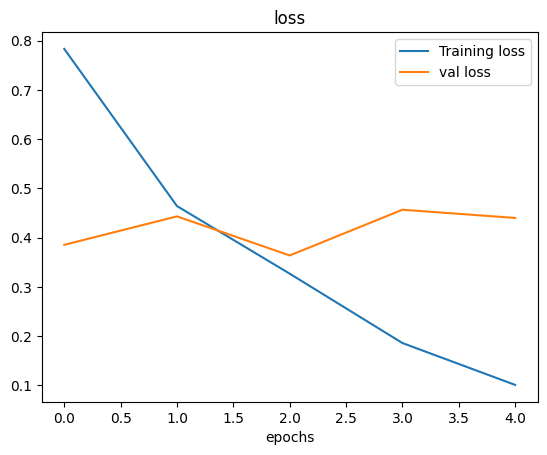

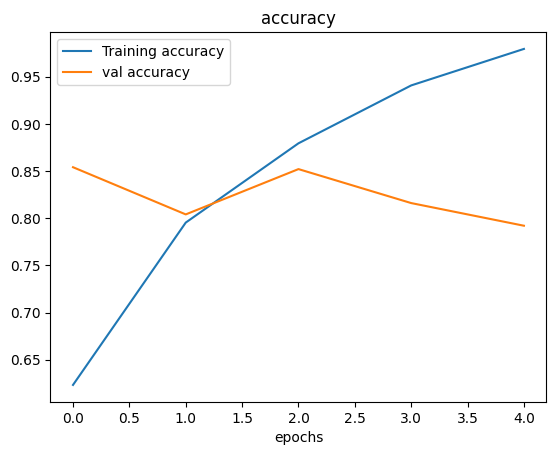

In [ ]:
plot_loss_curves(history_4)

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

### Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [ ]:
# Create the model(new baseline)

model_5 = Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
# Compile the data
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.0354 - accuracy: 0.9947 - val_loss: 0.5082 - val_accuracy: 0.8440
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.0337 - accuracy: 0.9947 - val_loss: 0.5349 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 224ms/step - loss: 0.0246 - accuracy: 0.9980 - val_loss: 0.4920 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.0177 - accuracy: 0.9980 - val_loss: 0.5301 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.0133 - accuracy: 0.9993 - val_loss: 0.5496 - val_accuracy: 0.8720


In [ ]:
# Get a summary
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)   0

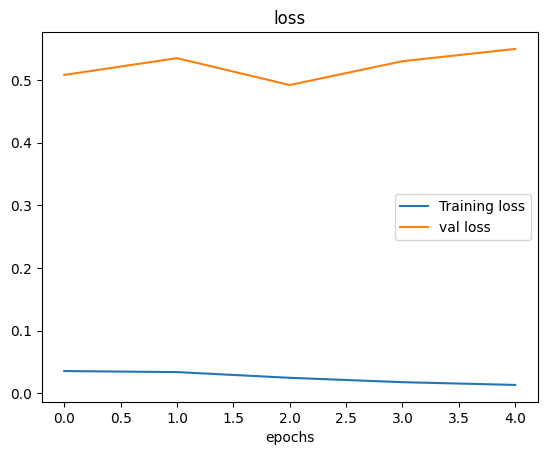

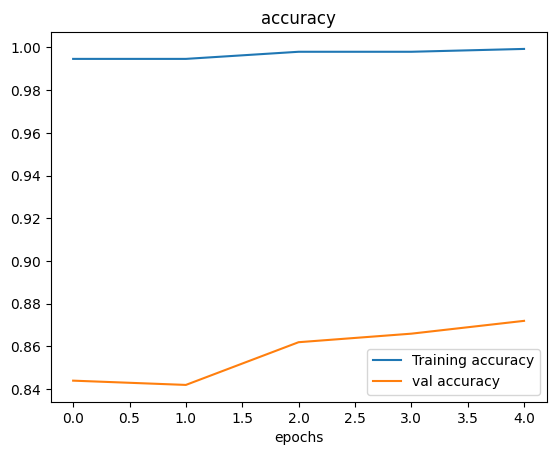

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for testing instance
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.


In [ ]:
# Import data and import it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode='binary',
                                                                    shuffle = False)

# Create non-augumented train data batches
print('Non-Augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)

# Create non-augumented test data batches
print('Non-Augmented testing data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented testing data:
Found 500 images belonging to 2 classes.


 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.


In [ ]:
# Get sample data batches
images,labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()

Image number: 12


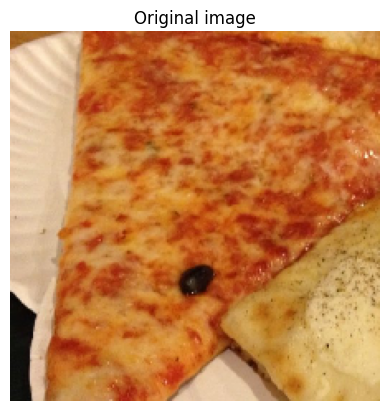

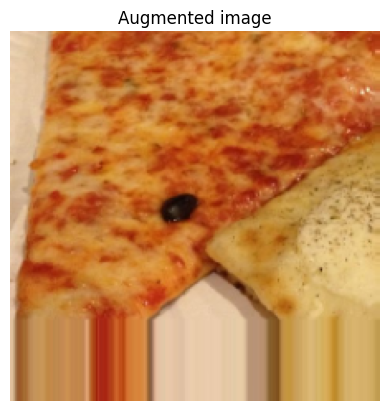

In [ ]:
# Show original image and augmented image
import random
random_num = random.randint(0,31) # batch size is 32
print(f'Image number: {random_num}')
plt.imshow(images[random_num])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_num])
plt.title('Augmented image')
plt.axis(False);

In [ ]:
# Create a model(same as model 5)
model_6 = Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 534ms/step - loss: 0.7447 - accuracy: 0.5047 - val_loss: 0.6655 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.7609 - accuracy: 0.6073 - val_loss: 0.7178 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 23s 501ms/step - loss: 0.7022 - accuracy: 0.4627 - val_loss: 0.6875 - val_accuracy: 0.6940
Epoch 4/5
47/47 [==============================] - 23s 500ms/step - loss: 0.7035 - accuracy: 0.6080 - val_loss: 0.6639 - val_accuracy: 0.6680
Epoch 5/5
47/47 [==============================] - 26s 548ms/step - loss: 0.6908 - accuracy: 0.5653 - val_loss: 0.6669 - val_accuracy: 0.7060


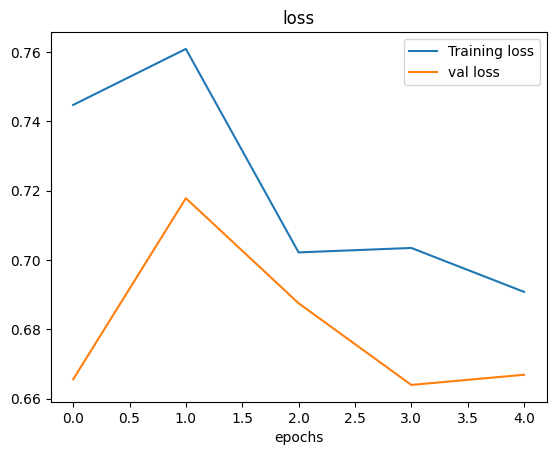

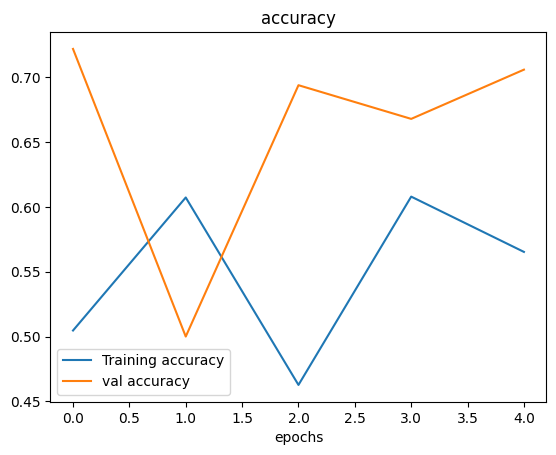

In [ ]:
# plot the loss curves
plot_loss_curves(history_6)

Let's see what happens when we shuffle the augmented training data.

In [ ]:
# Import the data and Augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model(same as model 5 and model 6)
model_7 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 36s 506ms/step - loss: 0.6492 - accuracy: 0.6080 - val_loss: 0.5614 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5492 - accuracy: 0.7293 - val_loss: 0.4226 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 24s 506ms/step - loss: 0.5258 - accuracy: 0.7520 - val_loss: 0.3779 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.5258 - accuracy: 0.7493 - val_loss: 0.5638 - val_accuracy: 0.6900
Epoch 5/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5306 - accuracy: 0.7393 - val_loss: 0.4057 - val_accuracy: 0.8380


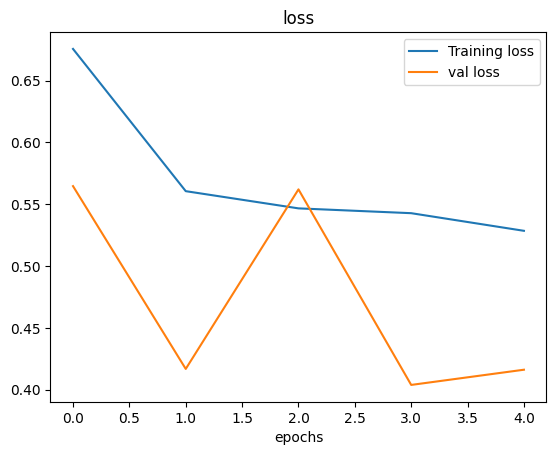

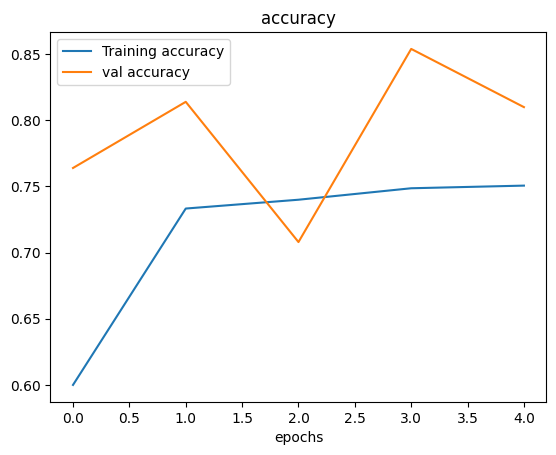

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

**Note** When shuffling training data, the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

### Repeat untill satisfied
We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

## Making a prediction with our trained model on our own custom data

--2023-07-02 05:58:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-07-02 05:58:04 (31.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



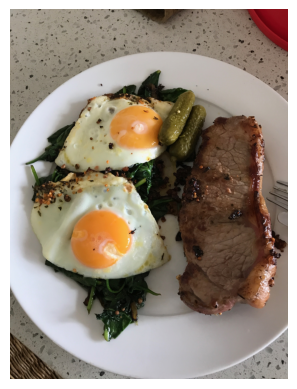

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

>  **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [26]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  # Read the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image (get all the values between 0 and 1)
  img = img/225
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [ ]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 177ms/step


array([[0.90929514]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [27]:
def pred_and_plot(model,filename,class_names=class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make predictions
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Predicted class: {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


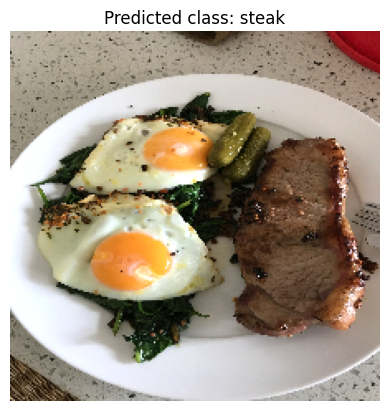

In [ ]:
# Test the model on custom image
pred_and_plot(model_7,'03-steak.jpeg')

--2023-06-25 13:57:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-06-25 13:57:07 (40.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 33ms/step


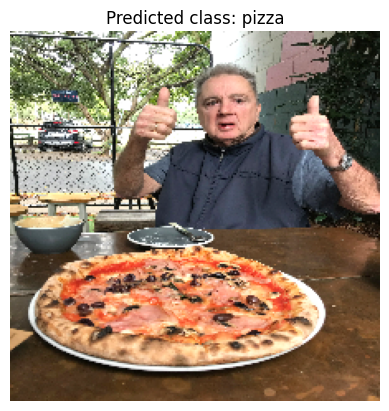

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

### Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-13 06:42:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.5MB/s    in 25s     

2023-07-13 06:42:55 (20.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

In [3]:
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 10 directories and 0 imag

In [4]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [5]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1987841.jpg']
Image shape (512, 512, 3)


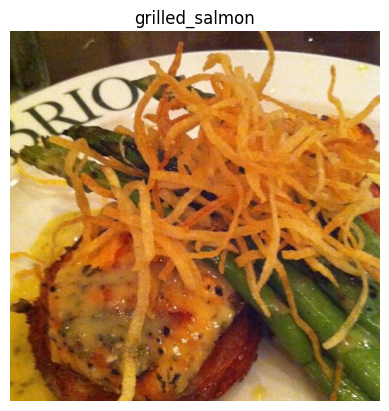

In [ ]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### Preprocess the data (Prepare it for a model)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load the data in from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model (start with a baseline)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation

In [10]:
# Create a model
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### Fit the model

In [11]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 73s 262ms/step - loss: 2.1673 - accuracy: 0.2057 - val_loss: 1.9924 - val_accuracy: 0.2744
Epoch 2/5
235/235 [==============================] - 53s 225ms/step - loss: 1.8800 - accuracy: 0.3487 - val_loss: 1.8855 - val_accuracy: 0.3456
Epoch 3/5
235/235 [==============================] - 62s 262ms/step - loss: 1.5264 - accuracy: 0.4912 - val_loss: 1.9606 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 61s 261ms/step - loss: 0.9250 - accuracy: 0.6941 - val_loss: 2.4325 - val_accuracy: 0.2880
Epoch 5/5
235/235 [==============================] - 55s 234ms/step - loss: 0.3664 - accuracy: 0.8908 - val_loss: 3.3423 - val_accuracy: 0.2772


### Evaluate the model

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 14s 176ms/step - loss: 2.8891 - accuracy: 0.2924


[2.8891208171844482, 0.2924000024795532]

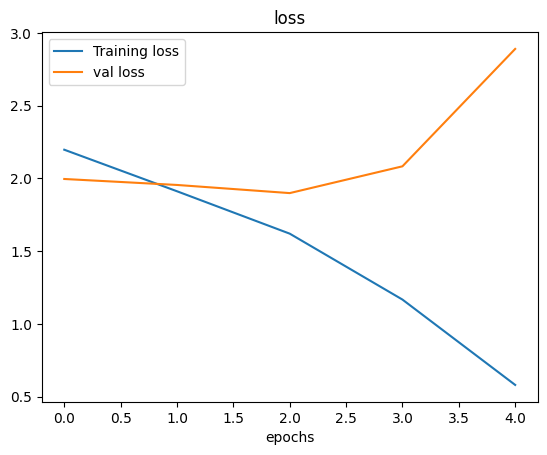

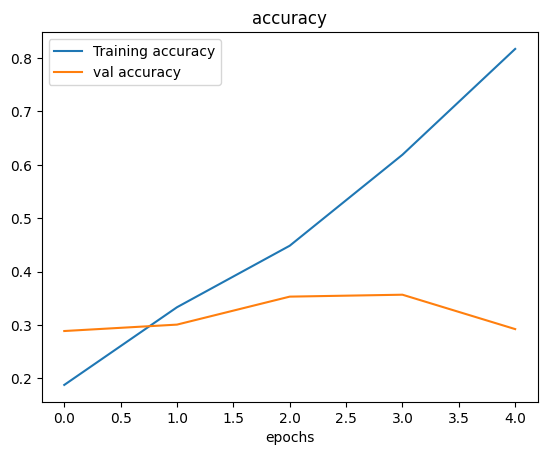

In [ ]:
# Plot the loss curve
plot_loss_curves(history_8)

What does this tell us?

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 **Note:** Preventing overfitting is also referred to as **regularization**.

In [ ]:
# Simplofy the model_8

model_9 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
model_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0         
                                                                 
 dense (Dense)               (None, 10)                2

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 63s 224ms/step - loss: 2.1376 - accuracy: 0.2331 - val_loss: 2.0581 - val_accuracy: 0.2764
Epoch 2/5
235/235 [==============================] - 51s 218ms/step - loss: 1.8382 - accuracy: 0.3695 - val_loss: 1.8886 - val_accuracy: 0.3396
Epoch 3/5
235/235 [==============================] - 51s 216ms/step - loss: 1.5140 - accuracy: 0.5025 - val_loss: 1.9443 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 63s 269ms/step - loss: 1.0732 - accuracy: 0.6587 - val_loss: 2.1790 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 51s 216ms/step - loss: 0.6253 - accuracy: 0.8185 - val_loss: 2.6158 - val_accuracy: 0.3044


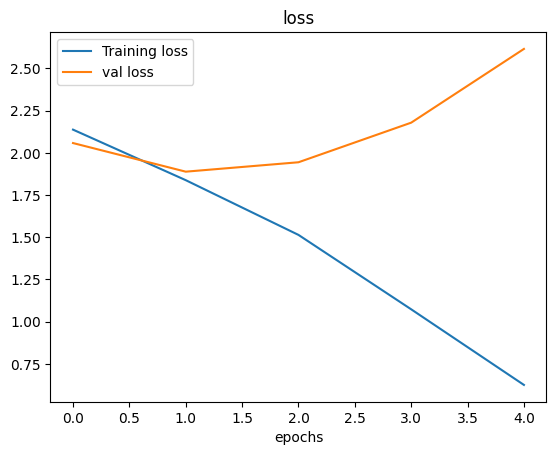

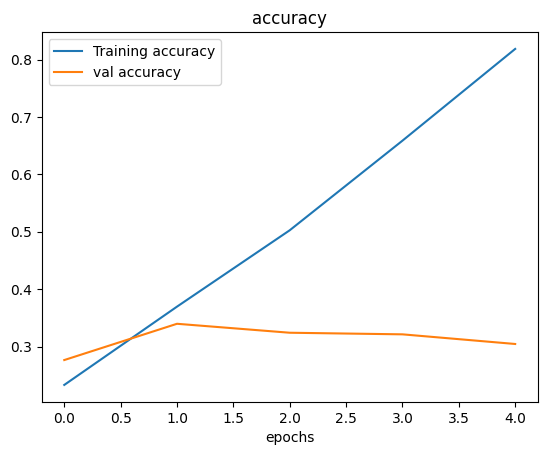

In [ ]:
plot_loss_curves(history_9)

it looks like our model is still dramatically overfitting the training data.

### Trying to reduce overfitting by Data Augmentation

In [8]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [12]:
# Create another model and fit it on the augmented data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model
model_10.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [13]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 548ms/step - loss: 2.1813 - accuracy: 0.1941 - val_loss: 2.0190 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 127s 542ms/step - loss: 2.0739 - accuracy: 0.2588 - val_loss: 1.9612 - val_accuracy: 0.3204
Epoch 3/5
235/235 [==============================] - 127s 542ms/step - loss: 2.0207 - accuracy: 0.2924 - val_loss: 1.8453 - val_accuracy: 0.3748
Epoch 4/5
235/235 [==============================] - 137s 582ms/step - loss: 1.9844 - accuracy: 0.3103 - val_loss: 1.9127 - val_accuracy: 0.3448
Epoch 5/5
235/235 [==============================] - 128s 544ms/step - loss: 1.9407 - accuracy: 0.3283 - val_loss: 1.7897 - val_accuracy: 0.3820


In [14]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 3.3423 - accuracy: 0.2772


[3.342250108718872, 0.27720001339912415]

In [15]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 1.7897 - accuracy: 0.3820


[1.7897493839263916, 0.38199999928474426]

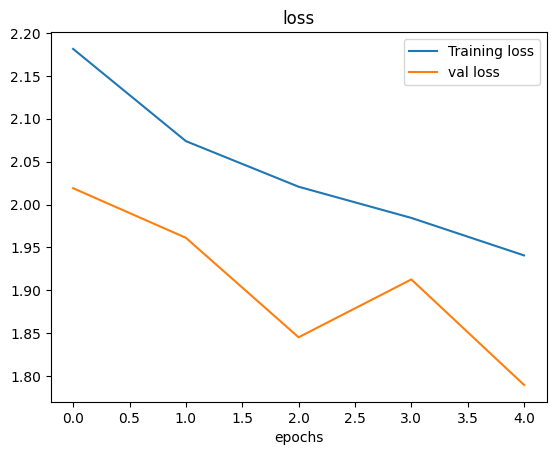

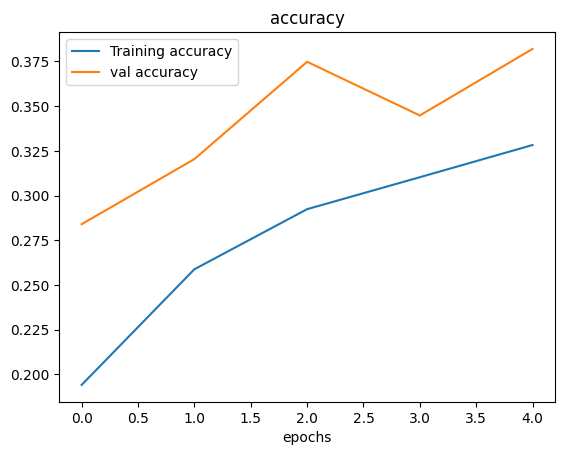

In [21]:
plot_loss_curves(history_10)

It looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

## Making a prediction with our trained model

In [23]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [46]:
def pred_and_plot(model,filename,class_names=class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make predictions
  pred = model.predict(tf.expand_dims(img,axis=0))
  if len(pred[0]>1):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Predicted class: {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


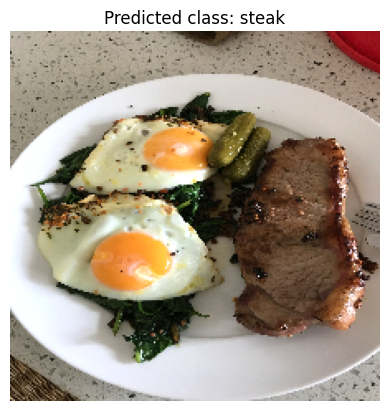

In [47]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 21ms/step


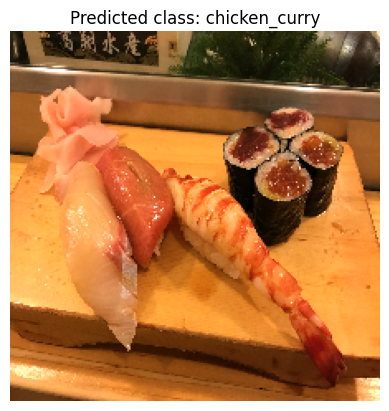

In [35]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 86ms/step


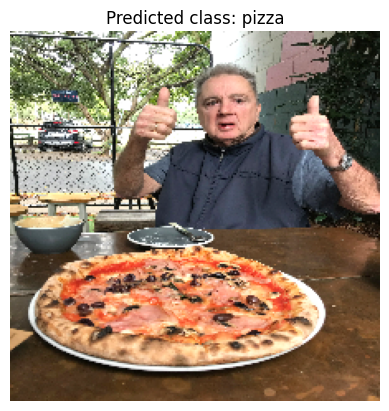

In [36]:
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

We can improve model performance using **Transfer Learning** approach

## Saving and loading model

In [48]:
# Save a model
model_10.save('saved_trained_model_10')

In [49]:
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 16s 196ms/step - loss: 1.7897 - accuracy: 0.3820


[1.7897499799728394, 0.38199999928474426]

In [50]:
# Compare loaded model to the existing model
model_10.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.7897 - accuracy: 0.3820


[1.7897498607635498, 0.38199999928474426]